In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
insurance_data = pd.read_csv('insurance_data.csv')

In [33]:
df_2 = insurance_data.copy()

In [34]:
df_2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [35]:
print('No. of Columns', df_2.shape[1])
print('No. of Rows', df_2.shape[0])

No. of Columns 10
No. of Rows 3000


In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [37]:
df_2.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [38]:
df_2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [39]:
check_null = df_2.isnull().sum().any()
if check_null == True:
    print('Dataset has Null values')
else:
    print('There are no Null values in the dataset')

There are no Null values in the dataset


In [40]:
df_2[df_2.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [41]:
print('Number of Duplicates :', df_2[df_2.duplicated()].shape[0])

Number of Duplicates : 139


In [42]:
df_2 = df_2.drop_duplicates().reset_index(drop=True)

In [43]:
df_2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [44]:
df_2['Agency_Code'].unique()

array(['C2B', 'EPX', 'CWT', 'JZI'], dtype=object)

In [45]:
cat = []
nums = []

for i in df_2.columns:
    if df_2[i].dtype == 'O':
        cat.append(i)
    else:
        nums.append(i)
        
df_2_cat = df_2[cat]
df_2_nums = df_2[nums]

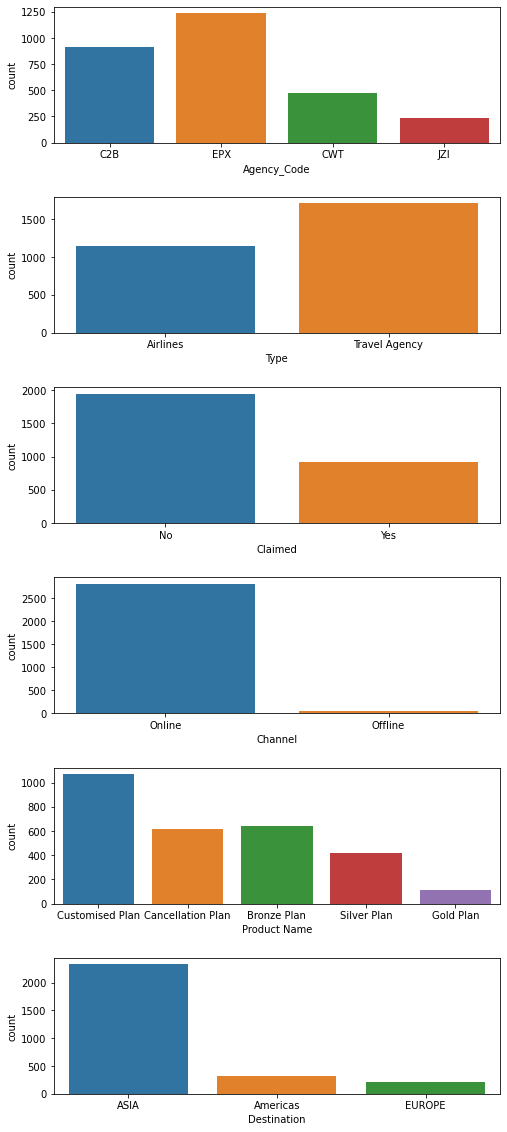

In [46]:
fig, axes = plt.subplots(nrows=len(df_2_cat.columns), ncols=1, figsize=(8,20))
for i in range(0, len(df_2_cat.columns)):
    sns.countplot(df_2_cat[df_2_cat.columns[i]], label=df_2_cat.columns[i], ax=axes[i])

plt.subplots_adjust(hspace=0.4)

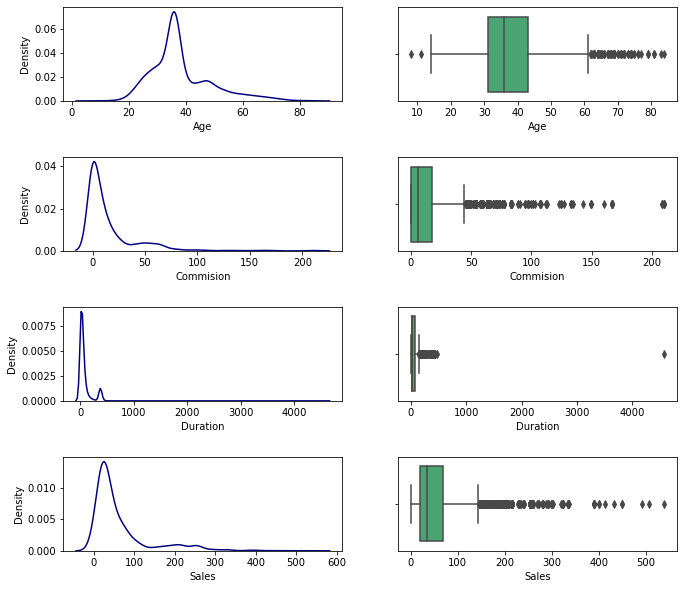

In [47]:
fig, axes = plt.subplots(nrows=len(df_2_nums.columns), ncols=2, figsize=(11,10))
for i in range(0, len(df_2_nums.columns)):
    sns.kdeplot(df_2_nums[df_2_nums.columns[i]], label=df_2_nums.columns[i], ax=axes[i][0], color='navy')
    sns.boxplot(df_2_nums[df_2_nums.columns[i]], ax=axes[i][1], color='mediumseagreen')

plt.subplots_adjust(hspace=0.6)

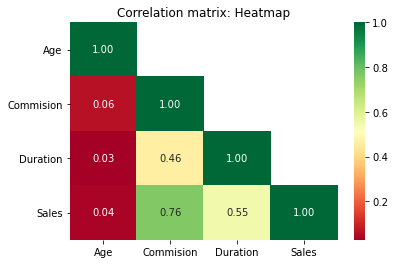

In [48]:
sns.heatmap(df_2_nums.corr(), cmap='RdYlGn', fmt='.2f', annot=True, mask=np.triu(df_2_nums.corr(),+1))
plt.title('Correlation matrix: Heatmap');

In [49]:
for feature in df_2.columns:
    if df_2[feature].dtype == 'O':
        df_2[feature] = pd.Categorical(df_2[feature]).codes

In [50]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 106.3 KB


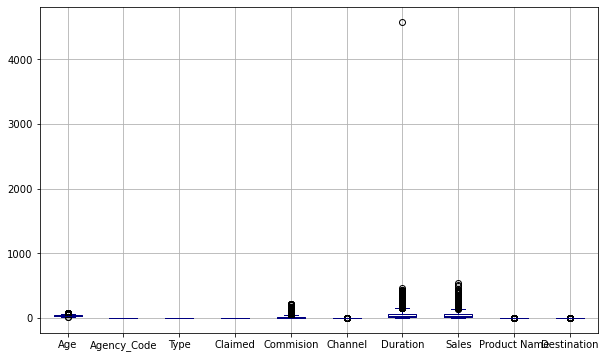

In [51]:
plt.figure(figsize=(10,6))
df_2.boxplot(color='navy', grid=False)
plt.grid(True)
plt.show();

In [52]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [53]:
for i in range(0, len(df_2.columns)):
    lr,ur = remove_outlier(df_2[df_2.columns[i]])
    df_2[df_2.columns[i]] = np.where(df_2[df_2.columns[i]]>ur,ur,df_2[df_2.columns[i]])
    df_2[df_2.columns[i]] = np.where(df_2[df_2.columns[i]]<lr,lr,df_2[df_2.columns[i]])

In [54]:
# for i in range(0, len(df_2_nums.columns)):
#     lr,ur = remove_outlier(df_2_nums[df_2_nums.columns[i]])
#     df_2_nums[df_2_nums.columns[i]] = np.where(df_2_nums[df_2_nums.columns[i]]>ur,ur,df_2_nums[df_2_nums.columns[i]])
#     df_2_nums[df_2_nums.columns[i]] = np.where(df_2_nums[df_2_nums.columns[i]]<lr,lr,df_2_nums[df_2_nums.columns[i]])

In [55]:
df_2.shape

(2861, 10)

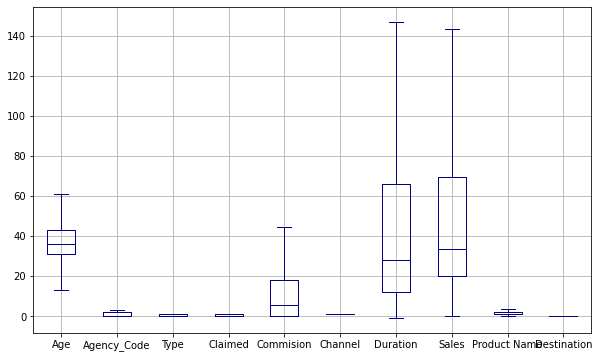

In [56]:
plt.figure(figsize=(10,6))
df_2.boxplot(color='navy', grid=False)
plt.grid(True)
plt.show();

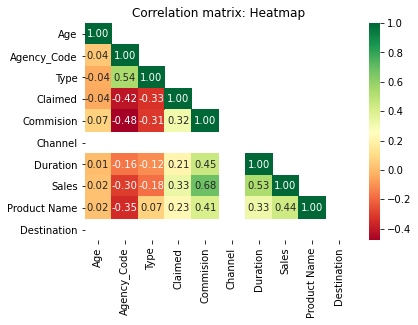

In [57]:
sns.heatmap(df_2.corr(), cmap='RdYlGn', fmt='.2f', annot=True, mask=np.triu(df_2.corr(),+1))
plt.title('Correlation matrix: Heatmap');

In [58]:
df_2['Channel']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2856    1.0
2857    1.0
2858    1.0
2859    1.0
2860    1.0
Name: Channel, Length: 2861, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

#Extract x and y
y = df_2['Claimed']
x = df_2.drop(['Claimed'], axis=1)

#minmax normalisation - regression RELU  (0-1) (x-min/max-min)

In [60]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=1)

In [61]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2002, 9)
x_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


### Decision Tree / CART Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini')
# Fit the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [64]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"],
                   index = x_train.columns).sort_values('Imp', ascending=False))

                   Imp
Duration      0.271741
Sales         0.245875
Age           0.199023
Agency_Code   0.171738
Commision     0.072144
Product Name  0.037973
Type          0.001506
Channel       0.000000
Destination   0.000000


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [66]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [67]:
# reg_dt_model = DecisionTreeClassifier(criterion='gini',
#                                       max_depth=8,
#                                       min_samples_leaf=20,
#                                       min_samples_split=45,
#                                       random_state=1)
# reg_dt_model.fit(x_train, y_train)

In [68]:
best_grid = grid_search.best_estimator_

In [69]:
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(best_grid, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [70]:
print(pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"],
                   index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.484560
Sales         0.268106
Duration      0.095086
Age           0.058741
Commision     0.055291
Product Name  0.038217
Type          0.000000
Channel       0.000000
Destination   0.000000


In [71]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

AUC: 0.846


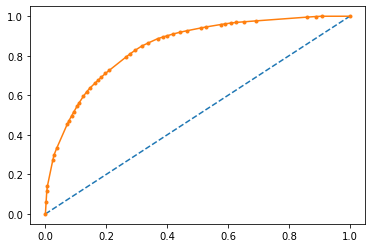

In [72]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
confusion_matrix(y_train, ytrain_predict)

array([[1190,  169],
       [ 261,  382]], dtype=int64)

In [75]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1359
         1.0       0.69      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [76]:
best_grid.score(x_train,y_train)

0.7852147852147852

AUC: 0.770


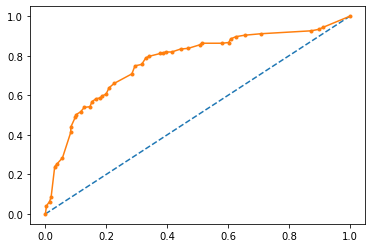

In [77]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [78]:
confusion_matrix(y_test, ytest_predict)

array([[502,  86],
       [124, 147]], dtype=int64)

In [79]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       588
         1.0       0.63      0.54      0.58       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



In [80]:
best_grid.score(x_test,y_test)

0.7555296856810244

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 7],
    'max_features': [4, 5],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [30, 45],
    'n_estimators': [101, 201]
}

#Build a RandomForestCassifier
rfcl = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=rfcl,
                           param_grid=param_grid,
                           cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 25],
                         'min_samples_split': [30, 45],
                         'n_estimators': [101, 201]})

In [82]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'n_estimators': 101}

In [83]:
best_grid = grid_search.best_estimator_

In [84]:
best_grid

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=20,
                       min_samples_split=30, n_estimators=101, random_state=1)

In [85]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

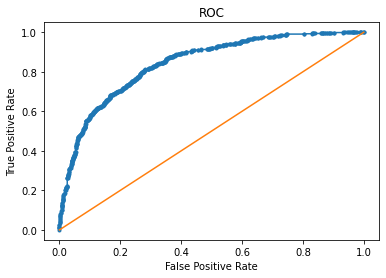

Area under Curve is 0.8429495432214476


In [86]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
# plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='.', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

In [87]:
confusion_matrix(y_train, ytrain_predict)

array([[1219,  140],
       [ 269,  374]], dtype=int64)

In [88]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1359
         1.0       0.73      0.58      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [89]:
best_grid.score(x_train,y_train)

0.7957042957042957

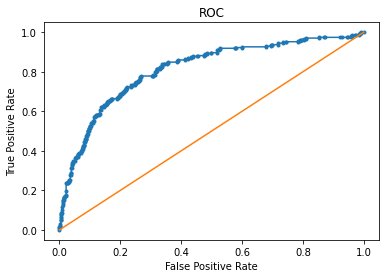

Area under Curve is 0.8131448151216207


In [90]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
# plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='.', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

In [91]:
confusion_matrix(y_test, ytest_predict)

array([[521,  67],
       [120, 151]], dtype=int64)

In [92]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       588
         1.0       0.69      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.78       859



In [93]:
best_grid.score(x_test,y_test)

0.7823050058207218

### Artificial Neural Network

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'max_iter': [7500, 10000],
    'solver': ['sgd','adam'],
    'tol': [0.1, 0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)  #320 models

grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [7500, 10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [95]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 7500,
 'solver': 'adam',
 'tol': 0.01}

In [96]:
best_grid = grid_search.best_estimator_

In [97]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

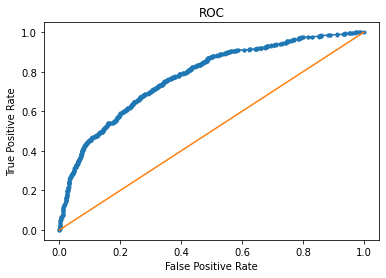

Area under Curve is 0.7770716964376652


In [98]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='.', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

In [99]:
confusion_matrix(y_train, ytrain_predict)

array([[1251,  108],
       [ 375,  268]], dtype=int64)

In [100]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      1359
         1.0       0.71      0.42      0.53       643

    accuracy                           0.76      2002
   macro avg       0.74      0.67      0.68      2002
weighted avg       0.75      0.76      0.74      2002



In [101]:
best_grid.score(x_train,y_train)

0.7587412587412588

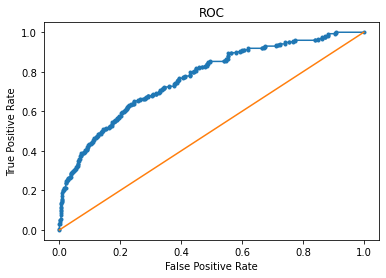

Area under Curve is 0.7688800612495921


In [102]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='.', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

In [103]:
confusion_matrix(y_test, ytest_predict)

array([[539,  49],
       [162, 109]], dtype=int64)

In [104]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       588
         1.0       0.69      0.40      0.51       271

    accuracy                           0.75       859
   macro avg       0.73      0.66      0.67       859
weighted avg       0.74      0.75      0.73       859



In [105]:
best_grid.score(x_test,y_test)

0.7543655413271245